The data is obtained from the UCI repository. You can find the original dataset at https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_excel('default_credit.xlsx')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Data Structure : 


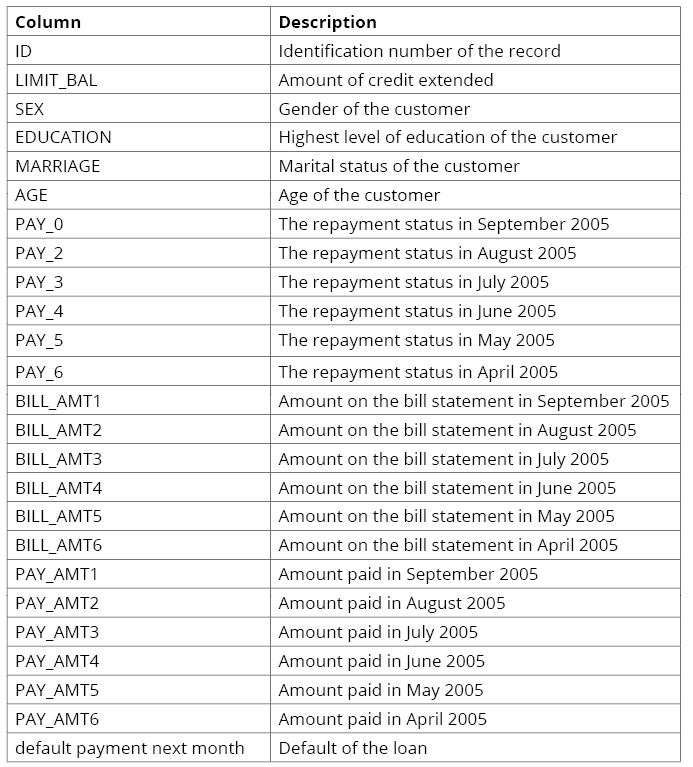

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. The following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [17]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

The data does not have any missing values.

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Data Preprocessing 

In [45]:
col = ["SEX", "EDUCATION", "MARRIAGE", "AGE","default payment next month"]
unique_values = {}
for i in col:
    unique_values[i] = str(sorted(data[i].unique()))
unique_values    

{'SEX': '[1, 2]',
 'EDUCATION': '[0, 1, 2, 3, 4, 5, 6]',
 'MARRIAGE': '[0, 1, 2, 3]',
 'AGE': '[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79]',
 'default payment next month': '[0, 1]'}

The EDUCATION column has 7 unique values, but as per our data description,we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4:

In [61]:
# replace [0,5,6] values in data["EDUCATION"] with 4(other)
val = [0,5,6]
for i in val: 
    data["EDUCATION"] = data["EDUCATION"].replace(i,4)
data["EDUCATION"].unique()

array([2, 1, 3, 4], dtype=int64)

The MARRIAGE column has 4 unique values, but as per our data description,we have only 3 unique values, so we are going to club categories 0, with category 3:

In [63]:
# replace [0] values in data["MARRIAGE"] with 3 (other)
val = [0]
for i in val: 
    data["MARRIAGE"] = data["MARRIAGE"].replace(i,3)
data["MARRIAGE"].unique()

array([1, 2, 3], dtype=int64)

In [79]:
data = data.rename(columns = {"default payment next month" : "DEFAULT"})

### Exploratory Data Analysis

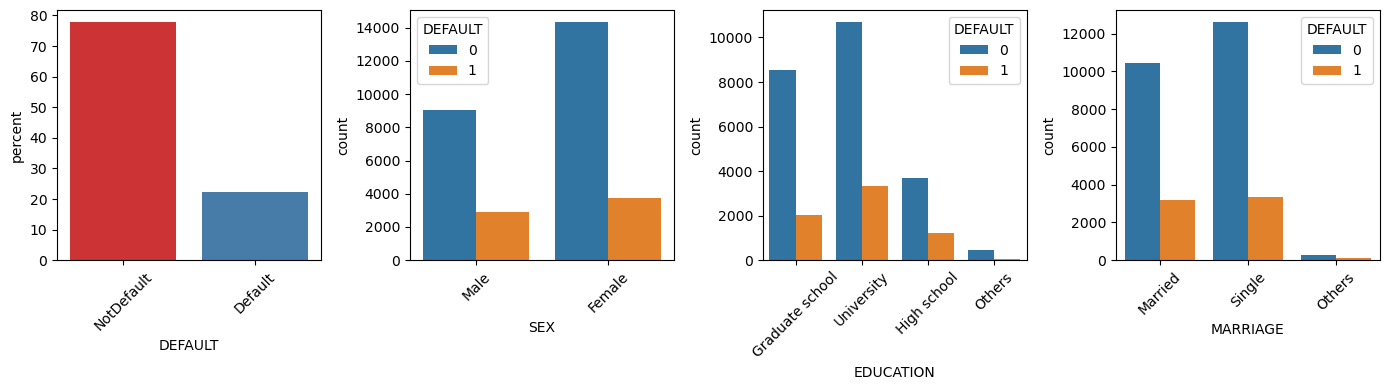

In [147]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(1,4,figsize = (14,4))
sns.countplot(data, x="DEFAULT" ,stat="percent", ax = ax[0], palette="Set1")
sns.countplot(data, x = "SEX", hue ="DEFAULT", ax = ax[1])
sns.countplot(data, x= "EDUCATION", hue ="DEFAULT", ax = ax[2])
sns.countplot(data, x = "MARRIAGE",  hue ="DEFAULT", ax = ax[3])

ax[0].set_xticklabels(["NotDefault", "Default"],rotation=45)
ax[1].set_xticklabels(["Male", "Female"],rotation=45)
ax[2].set_xticklabels([ "Graduate school", "University", "High school", "Others"], rotation=45)
ax[3].set_xticklabels([ "Married", "Single", "Others"], rotation=45)

   
plt.tight_layout()
plt.show()

In [143]:
# Crosstab to get normalized counts (proportions)
sex_data_normalized = pd.crosstab(data.SEX, data.DEFAULT, normalize='index', margins=True)
sex_data_normalized.columns = ['Non-defaulted', 'Defaulted']
sex_data_normalized.index = ['Male', 'Female', 'Total']

# Crosstab to get the raw counts (actual numbers)
sex_data_count = pd.crosstab(data.SEX, data.DEFAULT, margins=True)
sex_data_count.columns = ['Non-defaulted', 'Defaulted', 'Total']
sex_data_count.index = ['Male', 'Female', 'Total']

# Merge normalized and count data into a single DataFrame
sex_data_combined = pd.concat([sex_data_count, sex_data_normalized], keys=['Count', 'Normalized'], axis=1)

# Display the combined table
sex_data_combined

Count                     Normalized          
       Non-defaulted Defaulted  Total Non-defaulted Defaulted
Male            9015      2873  11888      0.758328  0.241672
Female         14349      3763  18112      0.792237  0.207763
Total          23364      6636  30000      0.778800  0.221200

- Men represent 40% of the clients, while women make up 60%.
- The proportion of men defaulted higher than the propotion of women : 24% of men defaulted, which is higher than the 20% of women who defaulted.

In [151]:
edu_data_norm = pd.crosstab(data.EDUCATION,data.DEFAULT,normalize='index',margins=True)
edu_data_norm.columns = ['Non-defaulted', 'Defaulted']
edu_data_norm.index = ['Graduate School', 'University','High School','Others', 'Total']

edu_data = pd.crosstab(data.EDUCATION,data.DEFAULT,margins=True)
edu_data.columns = ['Non-defaulted', 'Defaulted', 'Total']
edu_data.index = ['Graduate School', 'University','High School','Others', 'Total']

edu_data_combined = pd.concat([edu_data_norm, edu_data], keys=['Normalized', 'Count'], axis = 1)
edu_data_combined

Normalized                   Count                 
                Non-defaulted Defaulted Non-defaulted Defaulted  Total
Graduate School      0.807652  0.192348          8549      2036  10585
University           0.762651  0.237349         10700      3330  14030
High School          0.748424  0.251576          3680      1237   4917
Others               0.929487  0.070513           435        33    468
Total                0.778800  0.221200         23364      6636  30000

- 47% of clients have a university degree, which is the largest group.
- 35% of clients have graduate school education, followed by 16% with high school education, and only 2% with other types of education.
- Among the groups, clients with high school education have the highest default rate of 25%, followed by those with university education (24%) and graduate school education (19%).
- Clients with other education have the lowest default rate (7%).

In [164]:
mar_data_norm = pd.crosstab(data.MARRIAGE,data.DEFAULT,normalize='index',margins=True)
mar_data_norm.columns = ['Non-defaulted', 'Defaulted']
mar_data_norm.index = ['Married', 'Single','Others', 'Total']

mar_data = pd.crosstab(data.MARRIAGE,data.DEFAULT,margins=True)
mar_data.columns = ['Non-defaulted', 'Defaulted', 'Total']
mar_data.index = ['Married', 'Single','Others', 'Total']

mar_data_combined = pd.concat([mar_data_norm, mar_data], keys=['Normalized', 'Count'], axis = 1)
mar_data_combined


Normalized                   Count                 
        Non-defaulted Defaulted Non-defaulted Defaulted  Total
Married      0.765283  0.234717         10453      3206  13659
Single       0.790717  0.209283         12623      3341  15964
Others       0.763926  0.236074           288        89    377
Total        0.778800  0.221200         23364      6636  30000

- Single clients tend to have the highest percentage of non-defaults, but their default rate is still significant at 20.93%.
- Married clients have a slightly higher default rate compared to single clients.
- The "Others" category represents a small portion of the population, but it mirrors the default rate of married clients.

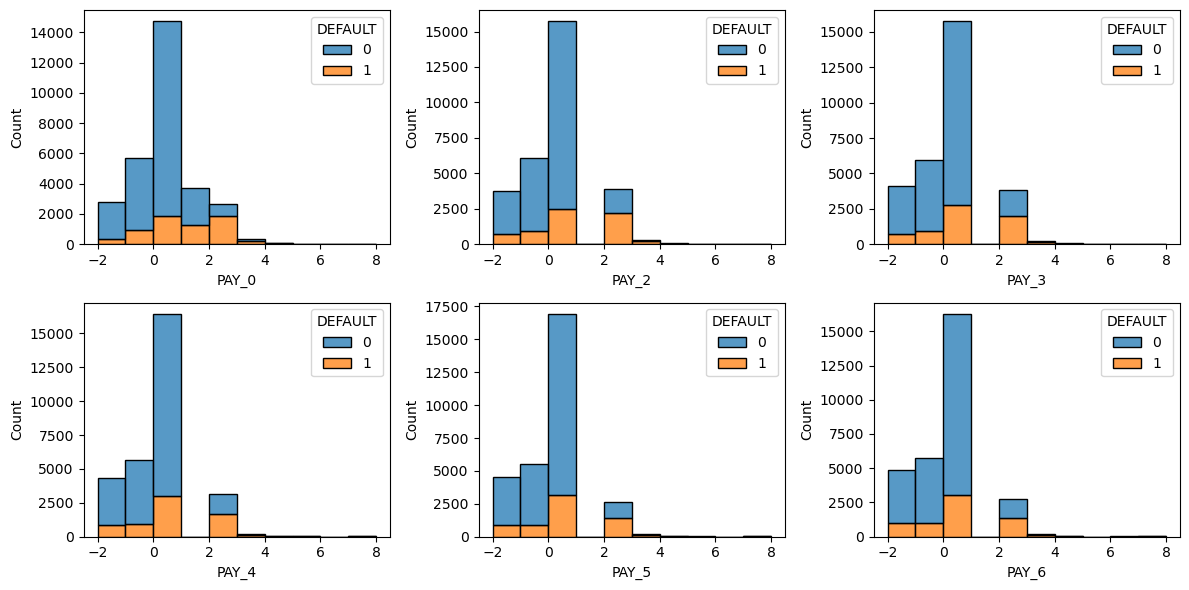

In [189]:
# History of past payment
pay_col = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Create subplots with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Loop over each column in pay_col and plot the histograms
for i, col in enumerate(pay_col):
    sns.histplot(data=data, x=col, hue="DEFAULT", multiple="stack", ax=ax[i], binwidth=1)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

The first plot for PAY_0 column shows  that the maximum count of defaults falls under subcategory 2, that is, a payment delay for the last 2 months.This implies that a customer who has missed payments for 2 continuous months has a high probability of default. For the other columns the subcategory zero shows tha maximum count of default.

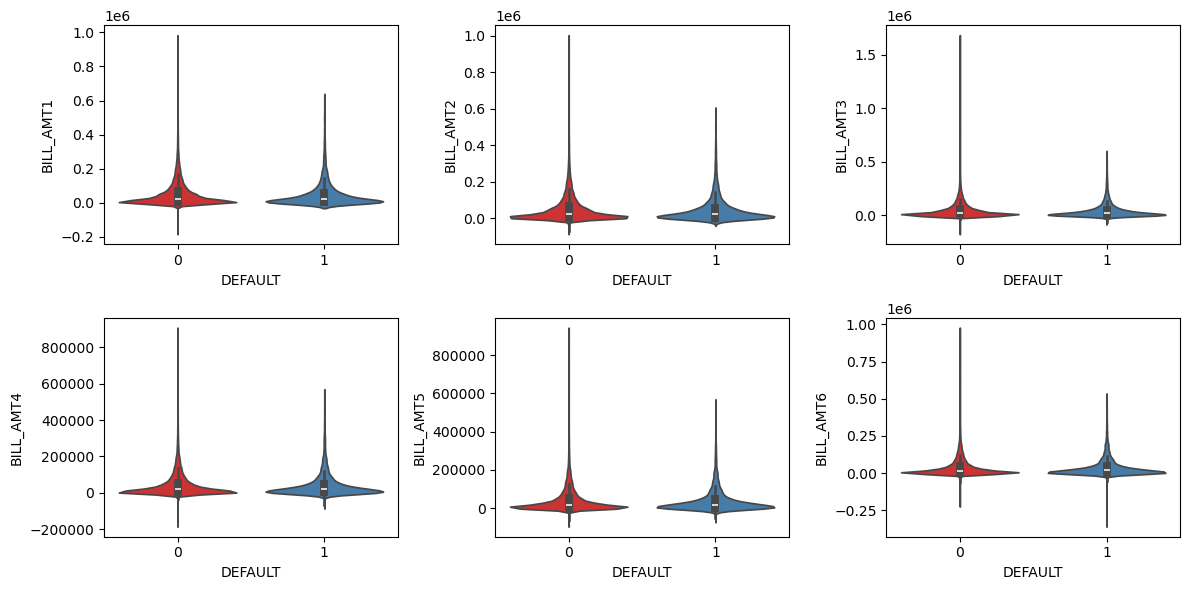

In [208]:
# Amount of bill statement (NT dollar)
bill_col = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Create subplots with 2 rows and 3 columns
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

# Flatten the axes array to make indexing easier
ax = ax.flatten()

# Loop over each column in pay_col and plot the histograms
for i, col in enumerate(bill_col):
    sns.violinplot(x="DEFAULT", y=col, data=data, ax=ax[i], palette="Set1")


plt.tight_layout()
plt.show()

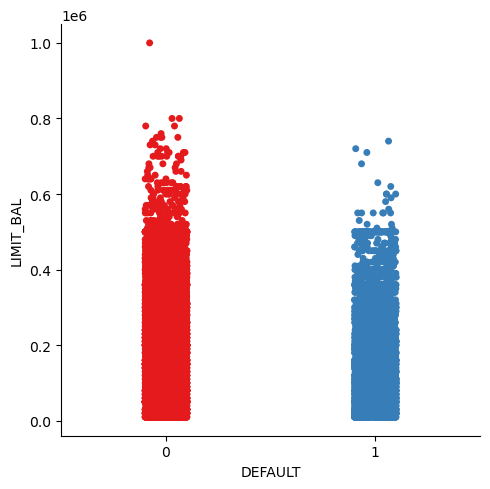

In [222]:
sns.catplot(x="DEFAULT", y="LIMIT_BAL", jitter=True, data=data, palette="Set1");

customers with higher balances have a lower likelihood of default than customers with lower balance amounts.

<Axes: xlabel='AGE', ylabel='Count'>

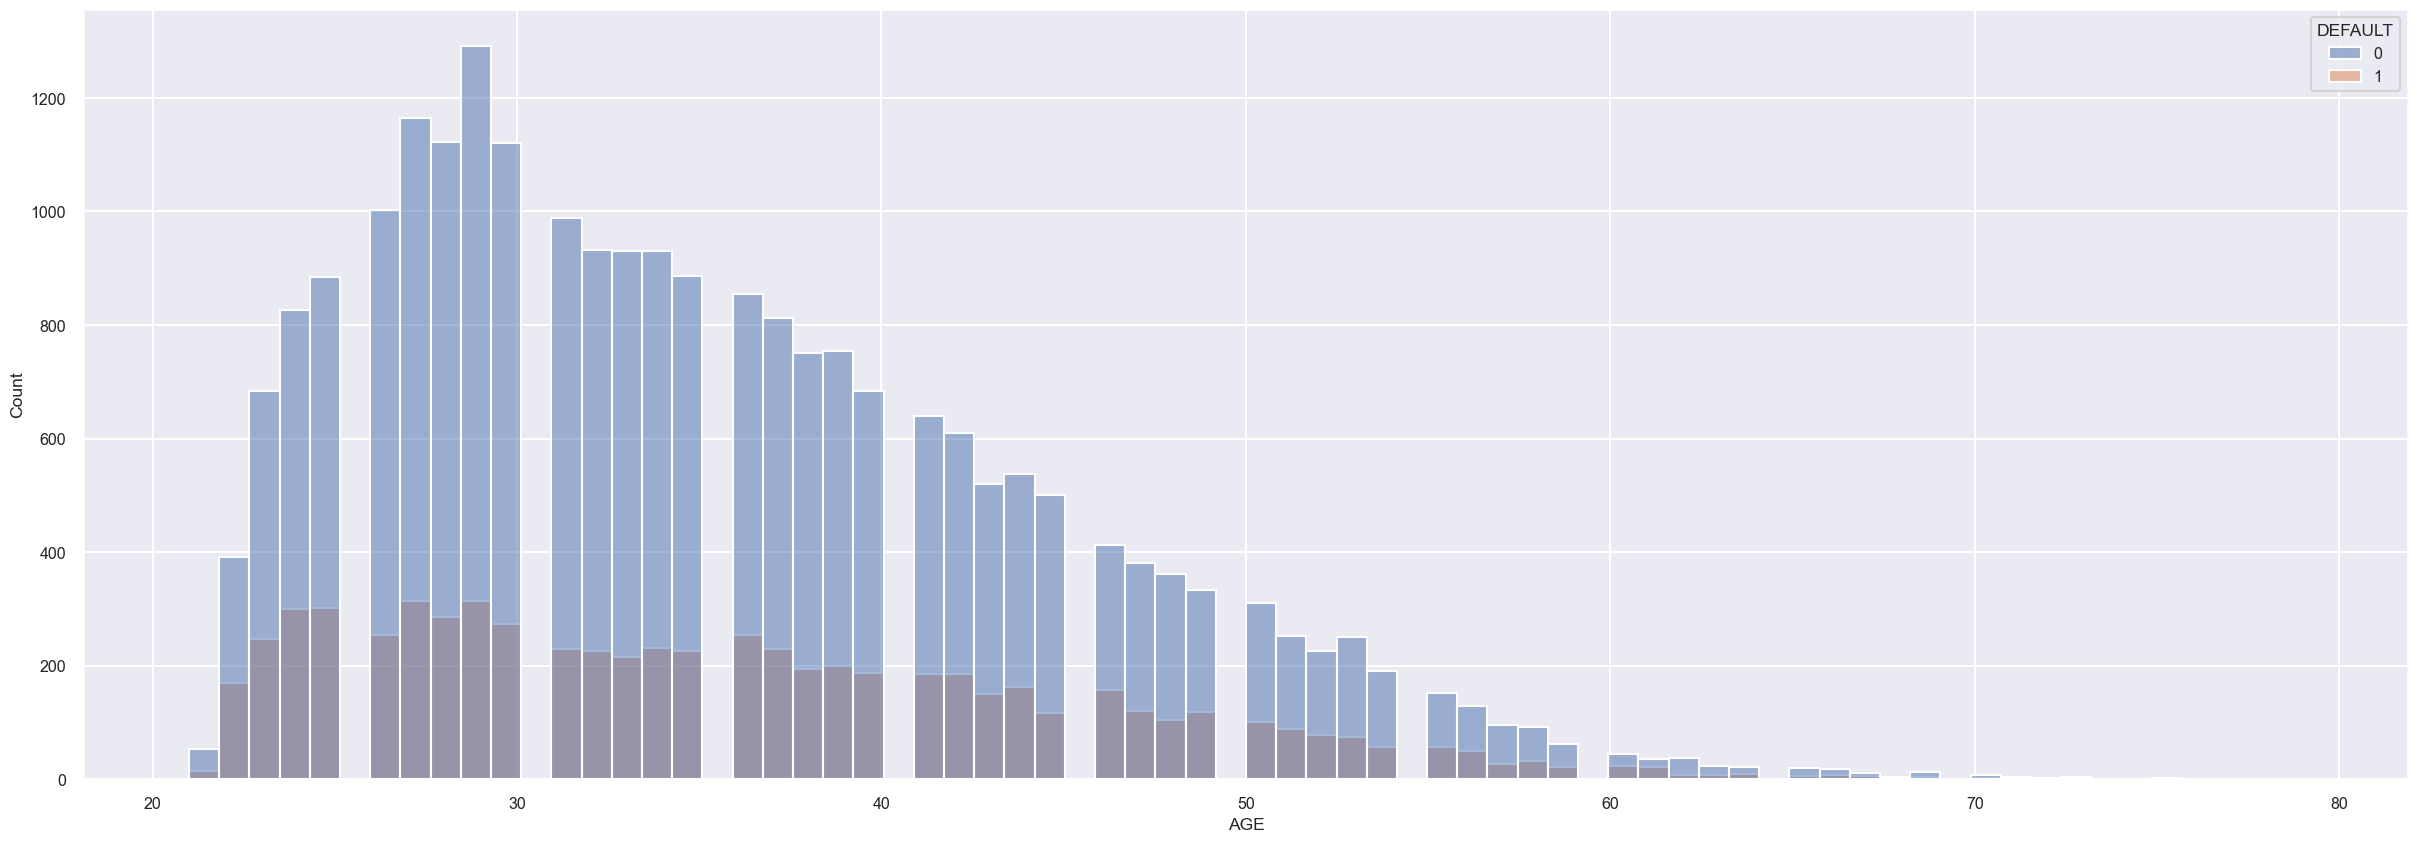

In [234]:
sns.histplot(data=data, x="AGE", hue="DEFAULT")

In [250]:
# Define the age bins (ranges)
age_bins = [0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80 ]  

# Define the corresponding labels for the age groups
age_labels = ['less then 20', '20-24', '25-29', '30-34', '35-39', 
             '40-44', '45-49', '50-54', '55-59',
             '60-64', '65-69', '70-74', '75-79']

# Create a new column 'AGE_GROUP' by binning the 'AGE' column
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=age_bins, labels=age_labels, right=False)

age_data = pd.crosstab(data.AGE_GROUP,data.DEFAULT,normalize='index',margins=True)
age_data.sort_values(by = 1)

DEFAULT,0,1
AGE_GROUP,,
30-34,0.806844,0.193156
25-29,0.788403,0.211597
35-39,0.786434,0.213566
All,0.778800,0.221200
40-44,0.774754,0.225246
45-49,0.763622,0.236378
50-54,0.755993,0.244007
65-69,0.752941,0.247059
75-79,0.750000,0.250000


The higher proportion of default belongs to the age group of (60-64) followed by (70-74) and (20-24)

#### Correlation

Spearman's rank correlation is a non-parametric measure of correlation between two variables that evaluates the strength and direction of the relationship between the rankings of the variables rather than their raw values. It is particularly useful for ordinal or continuous variables, especially when the relationship between the variables is not linear.

<Axes: >

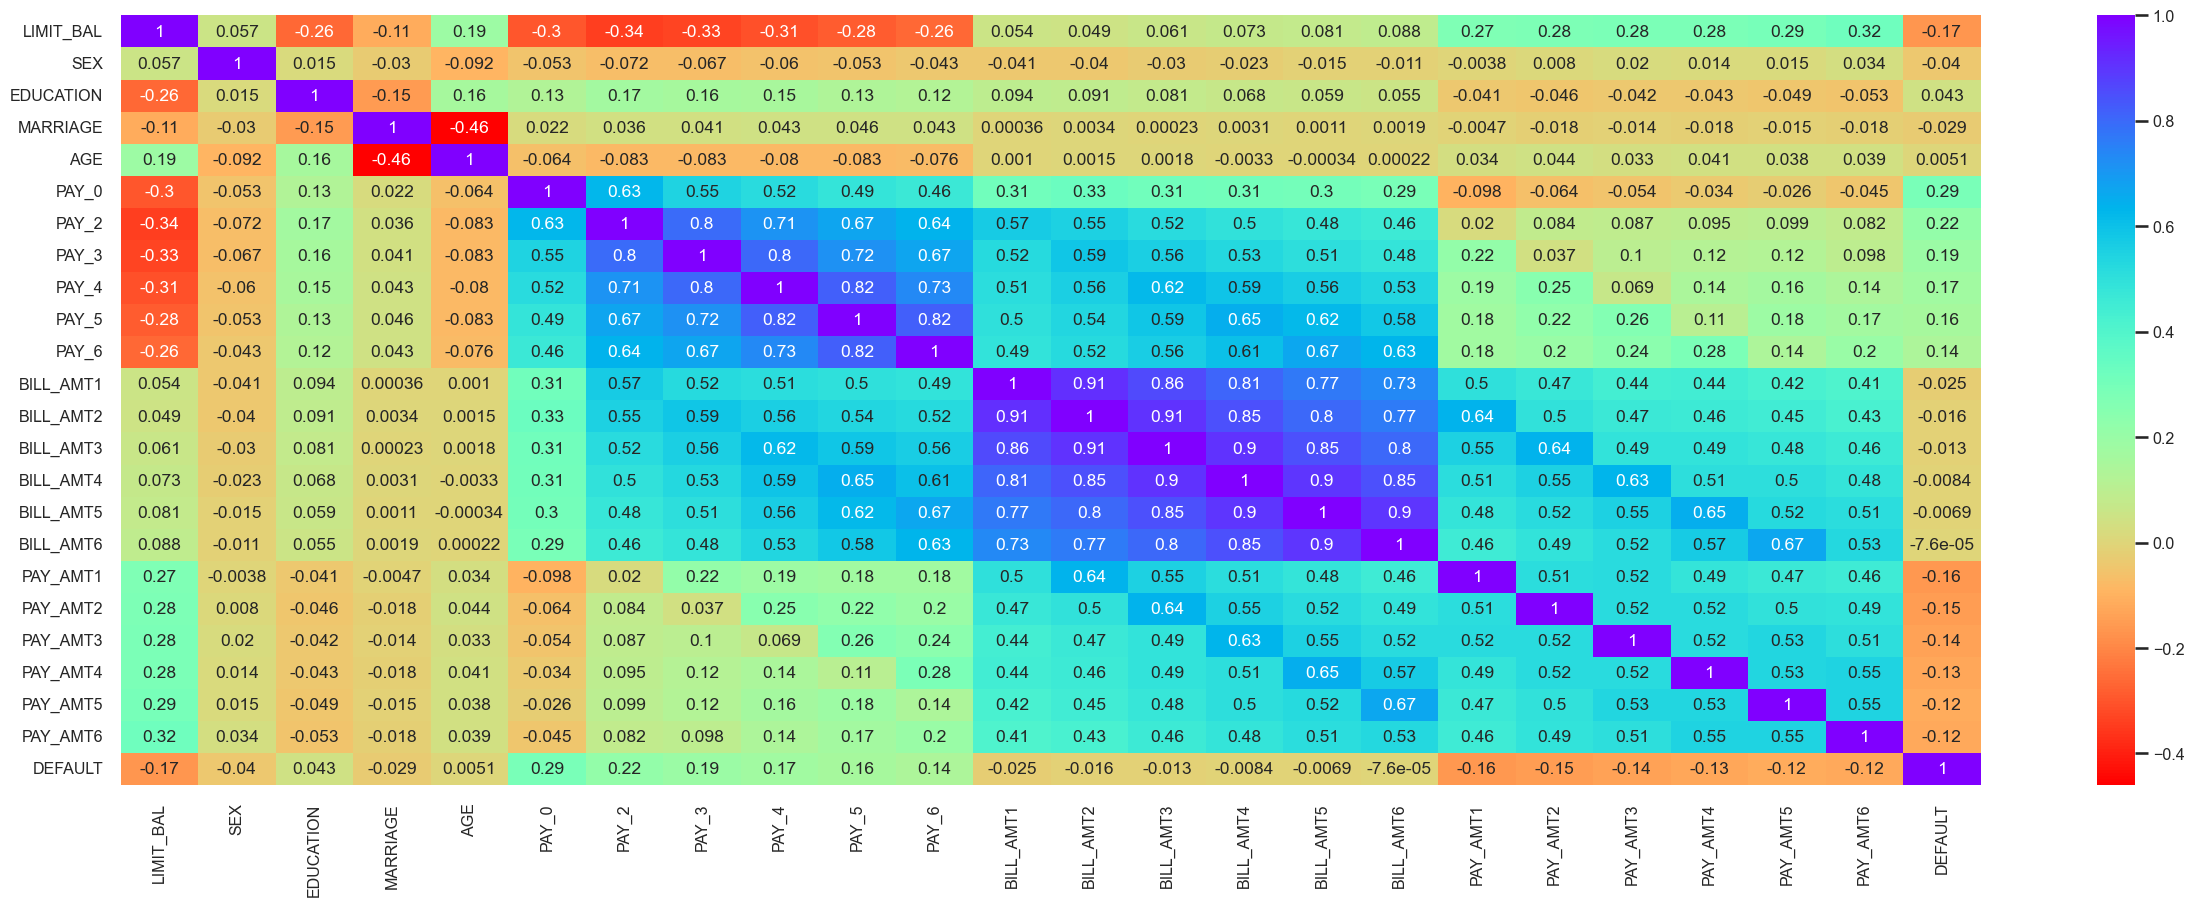

In [229]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(data.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

In [231]:
data.drop("DEFAULT", axis=1).apply(lambda x: x.corr(data.DEFAULT,method='spearman'))


ID          -0.013952
LIMIT_BAL   -0.169586
SEX         -0.039961
EDUCATION    0.043425
MARRIAGE    -0.028698
AGE          0.005149
PAY_0        0.292213
PAY_2        0.216919
PAY_3        0.194771
PAY_4        0.173690
PAY_5        0.159043
PAY_6        0.142523
BILL_AMT1   -0.025327
BILL_AMT2   -0.015554
BILL_AMT3   -0.012670
BILL_AMT4   -0.008357
BILL_AMT5   -0.006851
BILL_AMT6   -0.000076
PAY_AMT1    -0.160493
PAY_AMT2    -0.150977
PAY_AMT3    -0.139388
PAY_AMT4    -0.127979
PAY_AMT5    -0.116587
PAY_AMT6    -0.121444
dtype: float64

PAY Variables (PAY_0 to PAY_6): The payment status variables (delays in payment) exhibit the strongest correlation with the target variable, especially PAY_0. These are likely more predictive of default status.

LIMIT_BAL: There is a weak negative correlation between LIMIT_BAL (credit limit) and the target variable, suggesting that higher credit limits might be weakly associated with a reduced chance of default.

BILL_AMT and PAY_AMT Variables: The bill amounts show a very weak negative relationship with default status, while the payment amounts have a weak negative correlation. This suggests that people who make larger payments are slightly less likely to default.

Sex, Education, Marital Status, and Age: These categorical and demographic variables show very weak correlations with the target variable, indicating they might not be significant predictors in this context.

### CONCLUSION

Based on the analysis performed in the previous sections, we can conclude that: 
- The payment status variables (delays in payment) exhibit the strongest correlation with the target variable, especially PAY_0. These are likely more predictive of default status.
- Clinets who make larger payments are slightly less likely to default.
- Whike Sex, Education, Marital Status, and Age had week correlation with the target variable we can see that 
- • A male customer is more likely to default than a female customer.
- • People with a relationship status of other are more likely to default than married or single people.
- • A customer whose highest educational qualification is a high-school diploma is more likely to default than a customer who has gone to graduate school or university.
- • A customer who is in (60-64) age group has a higher probability of defaulting on payments than any other age group.